In [2]:
import pandas as pd

In [3]:
subway=pd.read_csv('./001_1.MONTHLY_SUBWAY_INFO.csv')

In [4]:
# 전처리
subway=subway.groupby('date').sum()
subway=subway.drop(['wd','25-on','25_off','26-on','26_off','27-on','27_off'], axis=1)

##### 년월 두 번 입력 받아서 두 년월의 시간대별 지하철 승하차 인원수 비교 그래프 출력

201501~202107사이의 년월 2회 입력
첫번째 년월 YYYYmm:201912
두번째 년월 YYYYmm:202012


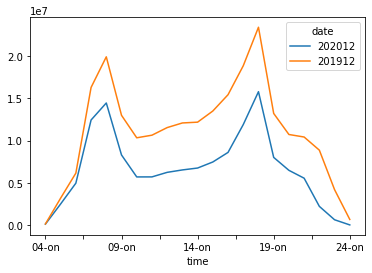

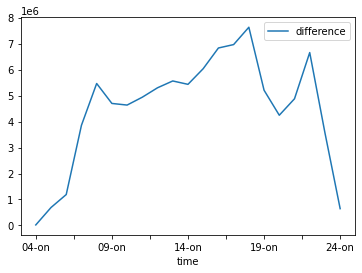

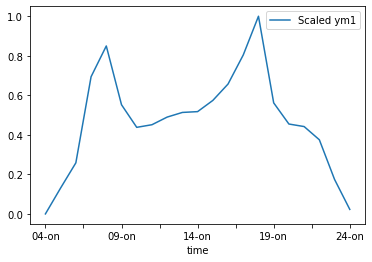

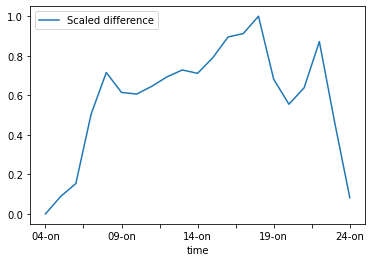

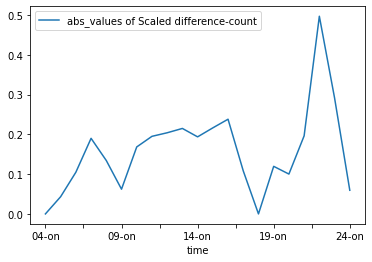

In [6]:
# Input
print('201501~202107사이의 년월 2회 입력')
ym1=int(input('첫번째 년월 YYYYmm:'))
ym2=int(input('두번째 년월 YYYYmm:'))
temp=subway.loc[[ym1,ym2]].transpose()
temp=temp.reset_index()
temp.rename(columns={'index':'time'},inplace=True)
sub=temp[temp['time'].str.contains('on')]
sub['difference']=sub[ym1]-sub[ym2]

# Scale
from sklearn.preprocessing import MinMaxScaler
scaler_ym1=MinMaxScaler()
scaler_ym1.fit(sub[[ym1]])
sub['Scaled ym1'] = scaler_ym1.transform(sub[[ym1]])

scaler_dif=MinMaxScaler()
scaler_dif.fit(sub[['difference']])
sub['Scaled difference'] = scaler_dif.transform(sub[['difference']])

# plot
sub['abs_values of Scaled difference-count']=abs(sub['Scaled difference']-sub['Scaled ym1'])
sub.plot(x='time',y=[ym2,ym1])
sub.plot(x='time',y='difference')
sub.plot(x='time',y='Scaled ym1')
sub.plot(x='time',y='Scaled difference')
sub.plot(x='time',y='abs_values of Scaled difference-count')

import warnings
warnings.filterwarnings('ignore')